In [196]:
%matplotlib inline
import numpy as np, numpy.random
import matplotlib.pyplot as plt
import cvxopt as opt
from cvxopt import blas, solvers

np.random.seed(1) # fixed random seed

n_portfolio = 100 # number of portfolios
n_asset = 3 # number of assets

# generate random matrix
rand_matrix = np.random.random((n_portfolio, n_asset))
# print rand_matrix

In [187]:
# create portfolios
portfolio = np.zeros((n_portfolio, n_asset))
i = 0
for row in rand_matrix: # each portfolio sum up to 1
    row_sum = np.sum(row)
    j = 0
    for col in row:
        portfolio[i][j] = col/row_sum
        j += 1
    i += 1
# print portfolio

In [188]:
assets = [0.1, 0.2, 0.15] # 3 assets with different mean return
# find expected return of each portfolio
E = np.dot(portfolio, assets)
# print E

In [189]:
# covariance of all assets
C = np.array([[0.005, -0.01, 0.004], [-0.01, 0.04, -0.002], [0.004, -0.002, 0.023]])
# print C

In [190]:
# find variance of all portfolio
variance = np.zeros((n_portfolio, 1))
i = 0
for row in portfolio:
    variance[i] = np.dot(np.dot(row, C), row.T)
    i += 1
# print variance

     pcost       dcost       gap    pres   dres
 0: -1.5500e-01 -1.2000e+00  1e+00  6e-17  2e+00
 1: -1.5796e-01 -2.1000e-01  5e-02  1e-16  1e-01
 2: -1.9857e-01 -2.1066e-01  1e-02  6e-16  1e-02
 3: -1.9997e-01 -2.0011e-01  1e-04  1e-16  2e-04
 4: -2.0000e-01 -2.0000e-01  1e-06  3e-16  2e-06
 5: -2.0000e-01 -2.0000e-01  1e-08  1e-16  2e-08
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -1.5100e-01 -1.1918e+00  1e+00  0e+00  2e+00
 1: -1.5326e-01 -2.0079e-01  5e-02  3e-16  1e-01
 2: -1.7612e-01 -1.8635e-01  1e-02  3e-17  1e-17
 3: -1.7942e-01 -1.8013e-01  7e-04  3e-16  2e-17
 4: -1.7997e-01 -1.8000e-01  3e-05  1e-16  3e-17
 5: -1.8000e-01 -1.8000e-01  4e-07  4e-17  3e-17
 6: -1.8000e-01 -1.8000e-01  4e-09  1e-16  3e-17
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -1.4720e-01 -1.1840e+00  1e+00  6e-17  2e+00
 1: -1.4889e-01 -1.9217e-01  4e-02  1e-16  1e-01
 2: -1.6162e-01 -1.6915e-01  8e-03  2e-16  4e-17
 3: -1.6399e-01 -1.6445e

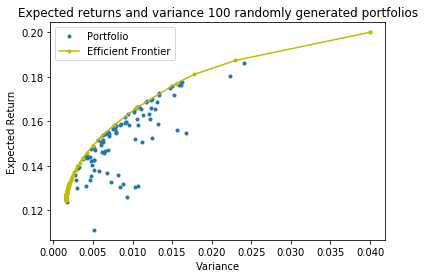

In [191]:
fig, ax = plt.subplots()
plotfolios = ax.plot(variance, E, 'o', markersize=3, label='Portfolio')
plt.xlabel('Variance')
plt.ylabel('Expected Return')
plt.title('Expected returns and variance 100 randomly generated portfolios')
# plt.legend(loc='upper left')
# plt.show()

N = 100
points = [t for t in range(N)] # find max return for 100 points
S = opt.matrix(C)
q = opt.matrix(assets, (3, 1)) # mean return of 3 assets

G = -opt.matrix(np.eye(n_asset)) # all 3 portions >= 0
h = opt.matrix(0.0, (n_asset, 1))
A = opt.matrix(1.0, (1, n_asset)) # all 3 portions sum to 1
b = opt.matrix(1.0)

portfolios = [solvers.qp(x*S, -q, G, h, A, b)['x'] for x in points]
returns = [blas.dot(q, x) for x in portfolios]
risks = [blas.dot(x, S*x) for x in portfolios]

frontier = ax.plot(risks, returns, 'y-o', markersize=3, label='Efficient Frontier')
ax.legend(loc='best')
# plt.show()
# fig

In [197]:
# create portfolios with asset 1 allocated 0
rand_matrix1 = rand_matrix[:]
rand_matrix1[:, 0] = 0
# print rand_matrix1[:,0]
print rand_matrix

[[0.00000000e+00 7.20324493e-01 1.14374817e-04]
 [0.00000000e+00 1.46755891e-01 9.23385948e-02]
 [0.00000000e+00 3.45560727e-01 3.96767474e-01]
 [0.00000000e+00 4.19194514e-01 6.85219500e-01]
 [0.00000000e+00 8.78117436e-01 2.73875932e-02]
 [0.00000000e+00 4.17304802e-01 5.58689828e-01]
 [0.00000000e+00 1.98101489e-01 8.00744569e-01]
 [0.00000000e+00 3.13424178e-01 6.92322616e-01]
 [0.00000000e+00 8.94606664e-01 8.50442114e-02]
 [0.00000000e+00 1.69830420e-01 8.78142503e-01]
 [0.00000000e+00 4.21107625e-01 9.57889530e-01]
 [0.00000000e+00 6.91877114e-01 3.15515631e-01]
 [0.00000000e+00 8.34625672e-01 1.82882773e-02]
 [0.00000000e+00 9.88861089e-01 7.48165654e-01]
 [0.00000000e+00 7.89279328e-01 1.03226007e-01]
 [0.00000000e+00 9.08595503e-01 2.93614148e-01]
 [0.00000000e+00 1.30028572e-01 1.93669579e-02]
 [0.00000000e+00 2.11628116e-01 2.65546659e-01]
 [0.00000000e+00 5.33625451e-02 5.74117605e-01]
 [0.00000000e+00 5.89305537e-01 6.99758360e-01]
 [0.00000000e+00 4.14055988e-01 6.944001

In [175]:
portfolio1 = np.zeros((n_portfolio, n_asset))
i = 0
for row in rand_matrix1: # each portfolio sum up to 1
    row_sum = np.sum(row)
    j = 0
    for col in row:
        portfolio1[i][j] = col/row_sum
        j += 1
    i += 1
# print portfolio1
E1 = np.dot(portfolio1, assets)
# print E

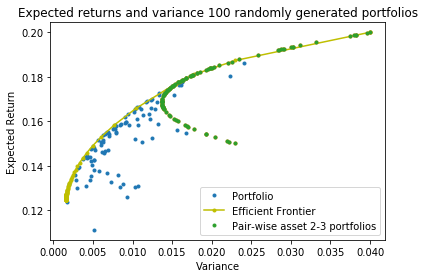

In [177]:
variance1 = np.zeros((n_portfolio, 1))
i = 0
for row in portfolio1:
    variance1[i] = np.dot(np.dot(row, C), row.T)
    i += 1

ax.plot(variance1, E1, 'o', markersize=3, label="Pair-wise asset 2-3 portfolios")
ax.legend()
# ax.legend_.remove()
fig
# plt.show()

In [180]:
# create portfolios with asset 1 allocated 0
rand_matrix2= rand_matrix
rand_matrix2[:, 1] = 0
print rand_matrix
# portfolio2 = np.zeros((n_portfolio, n_asset))
# i = 0
# for row in rand_matrix2: # each portfolio sum up to 1
#     row_sum = np.sum(row)
#     j = 0
#     for col in row:
#         portfolio2[i][j] = col/row_sum
#         j += 1
#     i += 1
# # print portfolio1
# E2 = np.dot(portfolio2, assets)

# variance2 = np.zeros((n_portfolio, 1))
# i = 0
# for row in portfolio2:
#     variance2[i] = np.dot(np.dot(row, C), row.T)
#     i += 1

# ax.plot(variance2, E2, 'o', markersize=3, label="Pair-wise asset 1-3 portfolios")
# ax.legend()
# # ax.legend_.remove()
# fig

[[0.00000000e+00 0.00000000e+00 1.14374817e-04]
 [0.00000000e+00 0.00000000e+00 9.23385948e-02]
 [0.00000000e+00 0.00000000e+00 3.96767474e-01]
 [0.00000000e+00 0.00000000e+00 6.85219500e-01]
 [0.00000000e+00 0.00000000e+00 2.73875932e-02]
 [0.00000000e+00 0.00000000e+00 5.58689828e-01]
 [0.00000000e+00 0.00000000e+00 8.00744569e-01]
 [0.00000000e+00 0.00000000e+00 6.92322616e-01]
 [0.00000000e+00 0.00000000e+00 8.50442114e-02]
 [0.00000000e+00 0.00000000e+00 8.78142503e-01]
 [0.00000000e+00 0.00000000e+00 9.57889530e-01]
 [0.00000000e+00 0.00000000e+00 3.15515631e-01]
 [0.00000000e+00 0.00000000e+00 1.82882773e-02]
 [0.00000000e+00 0.00000000e+00 7.48165654e-01]
 [0.00000000e+00 0.00000000e+00 1.03226007e-01]
 [0.00000000e+00 0.00000000e+00 2.93614148e-01]
 [0.00000000e+00 0.00000000e+00 1.93669579e-02]
 [0.00000000e+00 0.00000000e+00 2.65546659e-01]
 [0.00000000e+00 0.00000000e+00 5.74117605e-01]
 [0.00000000e+00 0.00000000e+00 6.99758360e-01]
 [0.00000000e+00 0.00000000e+00 6.944001

     pcost       dcost       gap    pres   dres
 0: -1.7625e-01 -1.2000e+00  5e+00  2e+00  3e+00
 1: -1.7623e-01 -6.4019e-01  5e-01  2e-02  3e-02
 2: -1.7869e-01 -2.0440e-01  3e-02  1e-03  1e-03
 3: -1.9979e-01 -2.0227e-01  3e-03  6e-05  8e-05
 4: -2.0000e-01 -2.0002e-01  3e-05  6e-07  9e-07
 5: -2.0000e-01 -2.0000e-01  3e-07  6e-09  9e-09
 6: -2.0000e-01 -2.0000e-01  3e-09  6e-11  9e-11
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -1.6844e-01 -1.1877e+00  5e+00  2e+00  3e+00
 1: -1.6843e-01 -6.3038e-01  5e-01  2e-02  3e-02
 2: -1.6992e-01 -1.9097e-01  2e-02  8e-04  1e-03
 3: -1.7807e-01 -1.8148e-01  3e-03  8e-06  1e-05
 4: -1.7969e-01 -1.8005e-01  4e-04  8e-08  1e-07
 5: -1.7998e-01 -1.8000e-01  2e-05  8e-10  1e-09
 6: -1.8000e-01 -1.8000e-01  2e-07  8e-12  1e-11
 7: -1.8000e-01 -1.8000e-01  2e-09  8e-14  1e-13
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -1.6074e-01 -1.1757e+00  5e+00  2e+00  3e+00
 1: -1.6074e-01 -6.2075e

Text(0.5,1,u'Expected returns and variance 100 randomly generated portfolios')

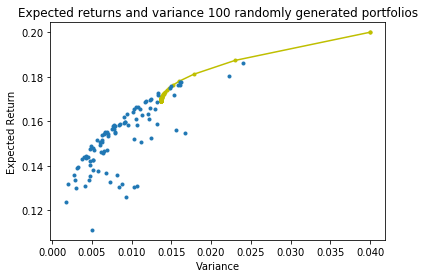

In [71]:
A = opt.matrix([1.0, 1.0, 1.0, 0.0, 1.0, 0.0], (2, 3)) # all 3 portions sum to 1
b = opt.matrix([1.0, 0.0], (2, 1))

x0portfolios = [solvers.qp(x*S, -q, G, h, A, b)['x'] for x in points]
returns = [blas.dot(q, x) for x in x0portfolios]
risks = [blas.dot(x, S*x) for x in portfolios]

plt.plot(risks, returns, 'y-o', markersize=3)
plt.plot(variance, E, 'o', markersize=3)
plt.xlabel('Variance')
plt.ylabel('Expected Return')
plt.title('Expected returns and variance 100 randomly generated portfolios')
# plt.show()